In [6]:
import os
if os.getcwd() == '/home/user/code':
    os.chdir('/home/user/code/nlp2024_ClefTask4SOTA')

%load_ext autoreload
%autoreload 2

In [7]:
from src.dataset import TDMSDataset, PATH

dataset = TDMSDataset(PATH.TRAIN)

# Where can a doctaet be extracted?

In [8]:
from src.content_extraction import all_sections

results = []
for i in range(len(dataset)):
    f, tex, jsn = dataset[i]
    sections = all_sections(tex)
    results.append({"f": f, "sections": sections})

In [9]:
import pandas as pd

df = pd.DataFrame(results)

In [10]:

def has_prop(sections, prop):
    sections = dict(sections)
    return prop in sections.keys()

def any_section_experiment_result(sections):
    return any(["experiment" in k.lower() or "result" in k.lower() for k, _ in sections])

df["has_title"] = df["sections"].apply(lambda c: has_prop(c, "title"))
df["has_abstract"] = df["sections"].apply(lambda c: has_prop(c, "abstract"))
df["has_table"] = df["sections"].apply(lambda c: has_prop(c, "table"))
df["has_results_experiments"] = df["sections"].apply(lambda c: any_section_experiment_result(c))

In [31]:
l_tot = len(df)

print(len(df[df["has_title"]])/l_tot)
print(len(df[df["has_abstract"]])/l_tot)
print(len(df[df["has_table"]])/l_tot)
print(len(df[df["has_results_experiments"]])/l_tot)

0.7786458333333334
0.7909342447916666
0.65087890625
0.6182454427083334


In [24]:
print(df.groupby(["has_title", "has_abstract", "has_table", "has_results_experiments"]).count()["f"].reset_index().to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
has_title & has_abstract & has_table & has_results_experiments & f \\
\midrule
False & False & False & False & 1359 \\
False & False & False & True & 77 \\
False & False & True & False & 233 \\
False & False & True & True & 530 \\
False & True & False & False & 135 \\
False & True & False & True & 50 \\
False & True & True & False & 51 \\
False & True & True & True & 285 \\
True & False & False & False & 155 \\
True & False & False & True & 38 \\
True & False & True & False & 77 \\
True & False & True & True & 100 \\
True & True & False & False & 1637 \\
True & True & False & True & 839 \\
True & True & True & False & 1044 \\
True & True & True & True & 5678 \\
\bottomrule
\end{tabular}



In [16]:
df.pivot().count()
# 4691 have no results / experiment, 7597 have

,f,sections,has_title,has_abstract,has_table,no_doctaet
has_results_experiments,,,,,,
False,4691,4691,4691,4691,4691,4691
True,7597,7597,7597,7597,7597,7597


In [12]:
df["no_doctaet"] = df.apply(lambda row: not any([row["has_title"], row["has_abstract"], row["has_table"], row["has_results_experiments"]]), axis=1)

In [13]:
df.groupby("no_doctaet").count()

# 10929 contain any doctaet info, 1359 contain none at all

,f,sections,has_title,has_abstract,has_table,has_results_experiments
no_doctaet,,,,,,
False,10929,10929,10929,10929,10929,10929
True,1359,1359,1359,1359,1359,1359


# Naive Doctaet

In [14]:
from src.content_extraction import naive_doctaet

doctaets = []
for i in range(len(dataset)):
    f, tex, jsn = dataset[i]
    doctaet = naive_doctaet(tex)
    doctaets.append({"f": f, "doctaet": doctaet})

<Axes: ylabel='Density'>

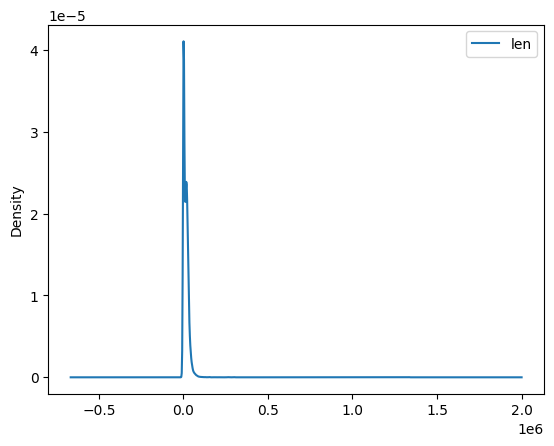

In [ ]:
import pandas as pd
df = pd.DataFrame(doctaets)
df["len"] = df["doctaet"].str.len()
df = df.sort_values("len", ascending=False)
df.plot(kind="kde")


In [ ]:
print(df.loc[5000][""]

f                                               1803.07485v1
doctaet    Experiments\n\label{sec:experiments}\n\n\begin...
len                                                    15193
Name: 5000, dtype: object

# How many tokens are necessary for DocTAET?

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model = "meta-llama/Meta-Llama-3-8B"
tokenizer = AutoTokenizer.from_pretrained(model)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:

def token_len(text):
    return len(tokenizer(text)["input_ids"])

df["token_len"] = df["doctaet"].apply(token_len)
df["char_len"] = df["doctaet"].str.len()

KeyboardInterrupt: 

<Axes: >

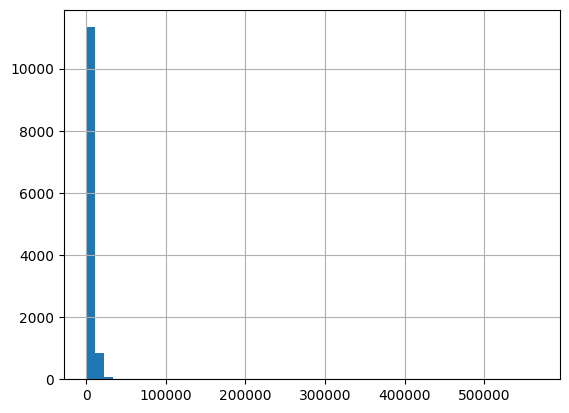

In [ ]:
df["token_len"].hist(bins=50)

In [ ]:
df["gt_8192"] = df["token_len"] > 8192
df.groupby("gt_8192").count()

,f,doctaet,len,token_len,char_len
gt_8192,,,,,
False,10136,10136,10136,10136,10136
True,2152,2152,2152,2152,2152


In [26]:
5678/(10136 + 2152)

0.4620768229166667

# Get Demonstration

In [ ]:
# i = 4400
i = 1

In [ ]:
print(naive_doctaet(dataset[i][1]))

title
Using Image Attributes for Human Identification Protocols
abstract

A secure human identification protocol aims at authenticating human users to a remote server when even the users' inputs are not hidden from an adversary. Recently, the authors proposed a human identification protocol in the RSA Conference 2007, which is loosely based on the ability of humans to efficiently process an image. The advantage being that an automated adversary is not effective in attacking the protocol without human assistance. This paper extends that work by trying to solve some of the open problems. First, we analyze the complexity of defeating the proposed protocols by quantifying the workload of a human adversary. Secondly, we propose a new construction based on textual CAPTCHAs (Reverse Turing Tests) in order to make the generation of automated challenges easier. We also present a brief experiment involving real human users to find out the number of possible attributes in a given image and give s

In [ ]:
print(dataset[i][2])

unanswerable

